In [1]:
!pip install xgboost

  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)


## Chapter 5

### LIME and SHAP
#### Here we will look at Perturbation methods, SHAP for a Linear model

##### We will look at Local interpretability provided for individual predictions 

We will be observing and interpreting the models using post hoc method 
SHAP <br>

We use the California Housing dataset from sklearn <br>

We are using the shap California Housing dataset. More details on the dataset can be found here <br>
https://shap.readthedocs.io/en/latest/generated/shap.datasets.california.html



| **Variable**       | **Description**                      |
|--------------------|--------------------------------------|
| MedInc (float)     | Median income in block               |
| HouseAge (float)   | Median house age in block            |
| AveRooms (float)   | Average rooms in dwelling            |
| AveBedrms (float)  | Average bedrooms in dwelling         |
| Population (float) | Block population                     |
| AveOccup (float)   | Average house occupancy              |
| Latitude (float)   | House block latitude                 |
| Longitude (float)  | House block longitude                |

The target column represents the median house value for California districts.

**Install the required libraries and initialize the shap JS for interactive visualization**

In [1]:
!pip install shap

In [4]:
import xgboost
import shap

shap.initjs()

**Load the dataset and train the XGB Regressor model**

In [5]:
# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)


**Call the shap Explainer function and get the shap values. Display the waterfall plot**

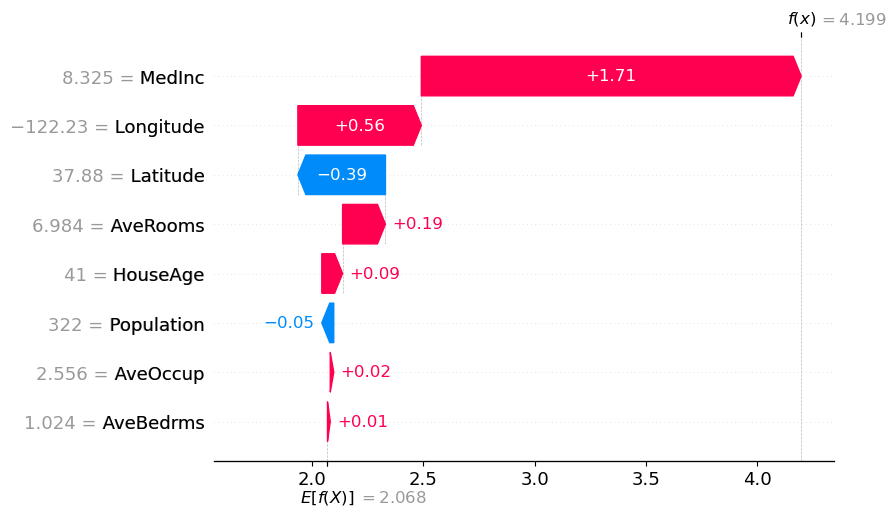

In [6]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output.

**Display the force plot for the first prediction**

In [7]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

 Shows which features had the most influence on the model's prediction for the first instance. We see features MedInc having the most influence.

**Display a summarized force plot for the first 500 values**

In [8]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

 Shows a summary of feature impacts on the model's prediction for multiple data instances

**Display scatter plot for feature latitude**

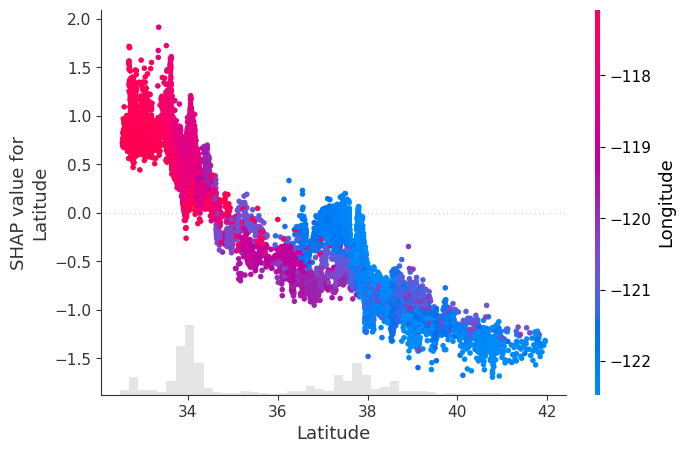

In [8]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

**Display beeswarm plot**

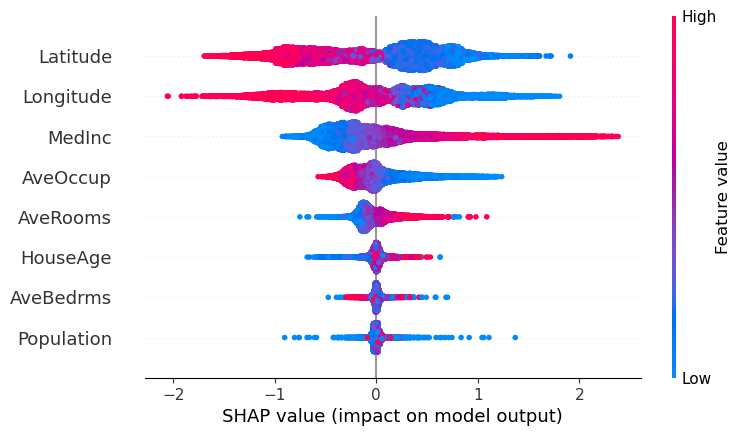

In [9]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

Displays information-dense summary of how the top features in a dataset impact the model's output. 

**Display the bar plot**

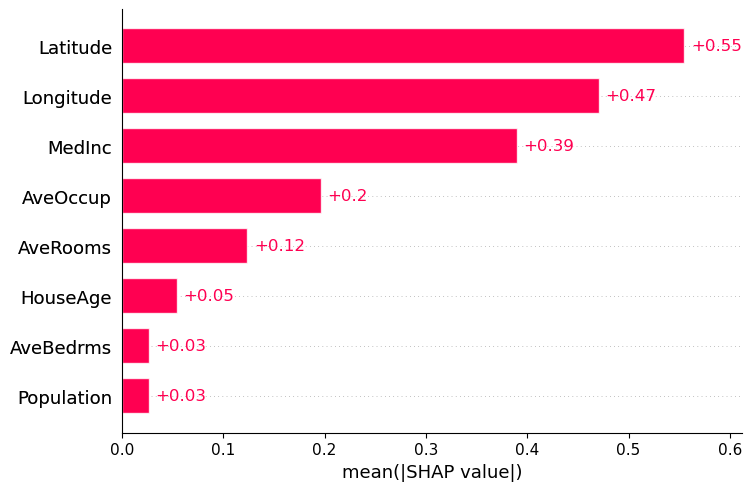

In [10]:
shap.plots.bar(shap_values)

The bar plot on the shap values shows the topr important features are Latitude, Longitude and MedInc. When we deep dive into a single instance we see that the order of feature importances can change.
